# Data Visulaization: Ford GoBike Trip Data
## by Noha Salama

## Table of Contents
<ul>
<li><a href="#intro">Intoduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this part of the project, I will be performing exploratory data analysis on Ford GoBike trip data from 2019.<br>The dataset contains ride information about people using Ford GoBike. These information include the time when the ride has started and ended, places (including longtitude & latitude) where the ride has started and ended, the duration of the ride, etc... In addition to that, there are some information about the users like their gender, birth year, and their type (whether they are subscribers or customers).

In the following, I will use Python visualization libraries to systematically explore the dataset, starting from plots of single variables and building up to plots of multiple variables.<br>
In the second part of the project, I will  transform the exploratory visualizations from the first part into polished, explanatory visualizations to illustrate interesting properties, trends, and relationships that I discovered in the dataset.

<a id='wrangling'></a>
## Preliminary Wrangling
In this section, I will first explore the dataset. Then, I will cleanse it to prepare it for the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


The dataset consists of 183412 rows and 16 columns.

There are some modifications that need to be perfomed. These modifications include removing irrelevant/inaccurate parts from the datset and changing data types of some labels.
To prepare the dataset for analysis, I will clean it as follows:
<ul><li>Remove bike trips that do not have <b>start_station_id</b>, <b>start_station_name</b>, <b>end_station_id</b> & <b>end_station_name</b></li>
<li>Remove bike trips whose memebers do not have <b>member_birth_year</b> & <b>member_gender</b></li>
<li>Convert column types of <b>start_time</b> & <b>end_time</b> from string to date time</li></ul>

In [6]:
#Remove rows
df.dropna(subset = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender'], inplace=True)
df.shape

(174952, 16)

In [7]:
#Convert column types
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%dT%H:%M:%S')
df['end_time'] = pd.to_datetime(df['end_time'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

Now the dataset is ready for analysis! But first, let's answer the below questions.

### What is the structure of your dataset?

The dataset contains 16 features (columns). After cleansing, there are 174952 entries for bike rides.

### What is/are the main feature(s) of interest in your dataset?

The main feature of intereset is the <b>duration_sec</b> which indicates the duration of the trip in seconds.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that will be explored throughout this project to support the investigation into <b>duration_sec</b> are:
<li><ul>start_time</ul><ul>user_type</ul><ul>member_birth_year</ul><ul>member_gender</ul></li>

<a id='uni'></a>
## Univariate Exploration

In this section, I will investigate distributions of individual variables, which are <b>duration_sec</b>, <b>start_time</b>, <b>user_type</b>. <b>member_birth_year</b>, <b>member_gender</b>. 

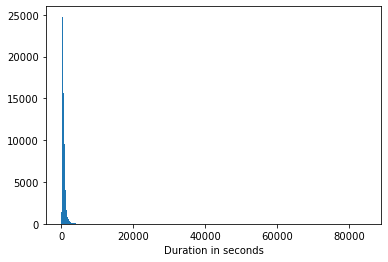

In [8]:
#duration_sec
bins = np.arange(0, df['duration_sec'].max()+100, 100)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in seconds');

Let's convert <b>duration_sec</b> to <b>duration_min</b> to make it more understandable and readable from the plot.

In [9]:
df['duration_sec'] = df['duration_sec']/60
df.rename(columns={'duration_sec':'duration_min'}, inplace=True)
df.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,27.370082,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


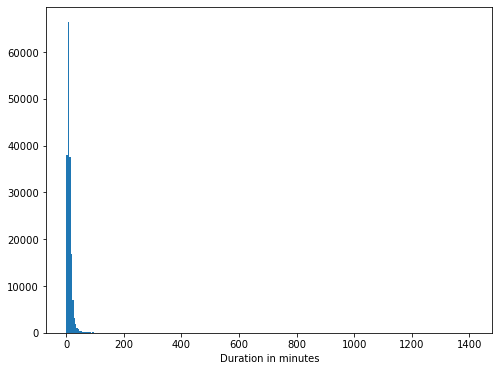

In [10]:
bins = np.arange(0, df['duration_min'].max()+5, 5)
plt.figure(figsize=[8, 6])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xlabel('Duration in minutes');

It seems that we have an outlier somwhere near 1400 minutes. Let's apply a log scale to make the skewness towards the large values on the left more visual.

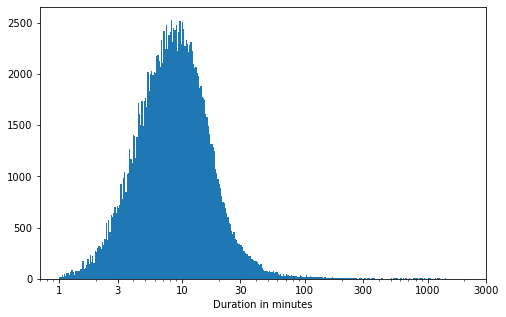

In [11]:
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+0.01, 0.01)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration in minutes');

After applying the log scale, the plot looks normally distributed with the peak at 10 minutes. We can neglect all rides that have lasted more than 300 minutes to get rid of the outliers.

In [12]:
df = df[df['duration_min'] <= 300]
df.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174759.000000,174759.000000,174759.000000,174759.000000,174759.000000,174759.000000,174759.000000,174759.000000,174759.000000
mean,10.986929,139.002821,37.771214,-122.351743,136.600793,37.771409,-122.351318,4482.503093,1984.802717
std,11.838526,111.641902,0.100414,0.117749,111.325575,0.100318,0.117312,1659.291583,10.120416
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,13.116667,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,296.716667,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Next, let's extract some information from the variable <b>start_time</b> to explore two different factors, which are the <b>start_hour</b> of the ride and the <b>day</b> of the week.

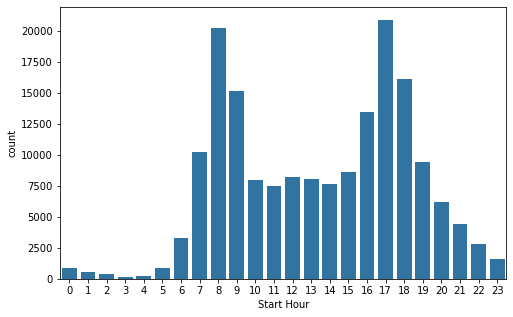

In [13]:
#get start hour & store it in a new column
df['start_hour'] = df['start_time'].dt.hour

color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.countplot(data = df, x = 'start_hour', color = color)
plt.xlabel('Start Hour');

This is a bimodal distrbution. The peaks are at 8:00 o'clock in the morning and 17:00 o'clock in th evening. This might indicate that members use Ford GoBike as a ride to their school/college/work and back home.

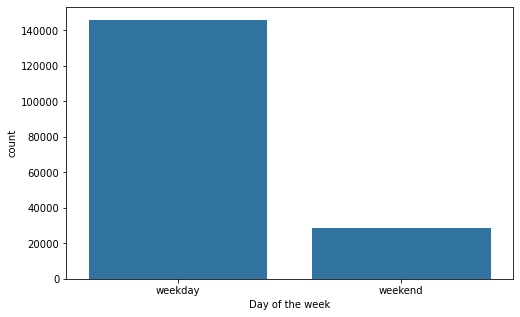

In [14]:
#get day & store it in a new column
day = df['start_time'].dt.dayofweek
df['day'] = day.apply(lambda x: 'weekend' if x==5 or x==6 else 'weekday')

color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.countplot(data = df, x = 'day', color = color)
plt.xlabel('Day of the week');

Members tend to use GoBike more during week days. This confirms the former guess that members use GoFord in their daily rides from/to school/college/work.

Next, we'll explore <b>user_type</b>.

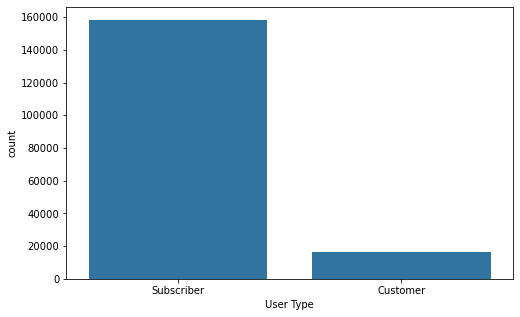

In [15]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.countplot(data = df, x = 'user_type', color = color)
plt.xlabel('User Type');

There are much more subscribers than customers in this dataset. This would make sense if we follow the previous assumption that members use Ford GoBike as a ride to their school/college/work and back home.

Now, let's explore <b>member_birth_year</b>.

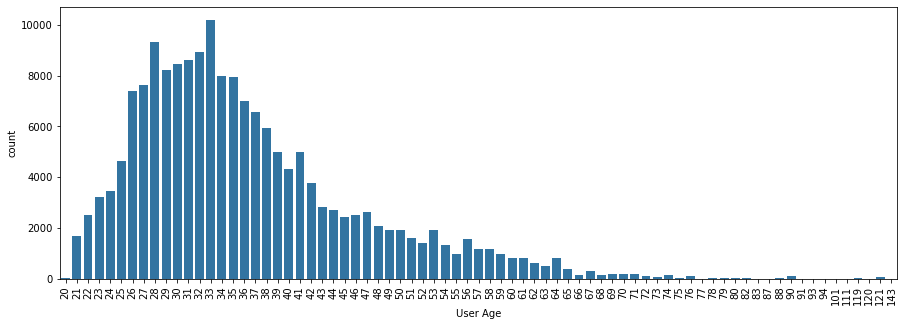

In [16]:
#calculate age & store it a new column
df['member_age'] = (2021 - df['member_birth_year']).astype(int)

color = sb.color_palette()[0]
plt.figure(figsize = [15, 5])
sb.countplot(data = df, x = 'member_age', color = color)
plt.xticks(rotation = 90)
plt.xlabel('User Age');

The distribution is right-skewed. Most of the members are between the ages of 26 - 36. There are outliers at ages greater than 76. We can neglect these to get rid of the outliers.

In [17]:
df = df[df['member_birth_year'] >= 1945]
df.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour,member_age
count,174494.000000,174494.000000,174494.000000,174494.000000,174494.000000,174494.000000,174494.000000,174494.000000,174494.000000,174494.000000,174494.000000
mean,10.990915,139.048976,37.771190,-122.351690,136.664756,37.771386,-122.351266,4482.505880,1984.892420,13.455248,36.107580
std,11.841624,111.648759,0.100485,0.117810,111.348141,0.100389,0.117374,1659.095246,9.842018,4.735045,9.842018
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1945.000000,0.000000,20.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000,29.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000,34.000000
75%,13.133333,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285633,5505.000000,1992.000000,17.000000,41.000000
max,296.716667,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,76.000000


Finally, we will explore <b>member_gender</b>.

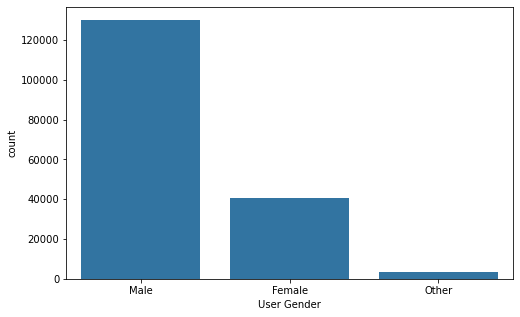

In [18]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.countplot(data = df, x = 'member_gender', color = color)
plt.xlabel('User Gender');

The number of males in the dataset is almost triple the number of females. There are also a few members whose gender is not identified. I will remove these.

In [19]:
df = df[df['member_gender'] != 'Other']
df['member_gender'].value_counts()

Male      130170
Female     40698
Name: member_gender, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Yes! There were some outliers that were removed and I have added some columns to the dataset that carry useful information. Here are the transformations performed: 
<ul><li>Converted <b>duration_sec</b> to <b>duration_min</b></li>
<li>Removed all trips that lasted longer than 300 mins</li>
<li>Removed all trips whose users are older than 76</li>
<li>Removed all trips whose users' gender is not identified</li>
<li>Added a new column <b>start_hour</b> which indicates the hour at which the trip started</li>
<li>Added a new column <b>day</b> which indicates whether the trip took place on a weekday or a weekend</li>
<li>Added a new column <b>member_age</b> which indicates the user's age</li></ul>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution for <b>duration_min</b> is normal after applying a log scale, the distribution for <b>start_hour</b> is bimodal and the distribution for <b>member_age</b> is right-skewed.

<a id='bi'></a>
## Bivariate Exploration

In this section, I will be investigating relationships between pairs of variables in the dataset. I will cover here the variables that have been introduced in the previous section (Univariate exploration).

First, we will explore <b>start_hour</b> versus <b>duration_min</b>.

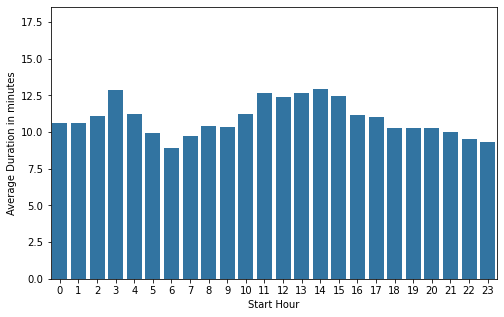

In [20]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.barplot(data = df, x = 'start_hour', y = 'duration_min', color = color, errwidth = 0);
plt.xlabel('Start Hour')
plt.ylabel('Average Duration in minutes');

Diffreent timings throughout the day do not show a significant difference in duration. Trips that start at 3:00 usually last longer while trips that start at 6:00 are the shortest, yet the difference between them is not of significance.

Next, we will explore <b>day</b> versus <b>duration_min</b>.

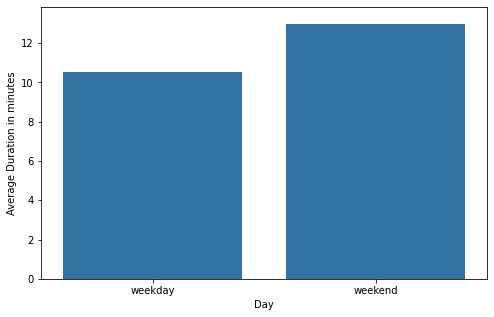

In [21]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.barplot(data = df, x = 'day', y = 'duration_min', color = color, errwidth = 0)
plt.xlabel('Day')
plt.ylabel('Average Duration in minutes');

On average trips taken on weekends last longer than trips taking place on weekdays. A reasonable explanation for this would be that people are more flexible and have more time and less commitments during weekends.

Now, let's explore <b>user_type</b> versus <b>duration_min</b>.

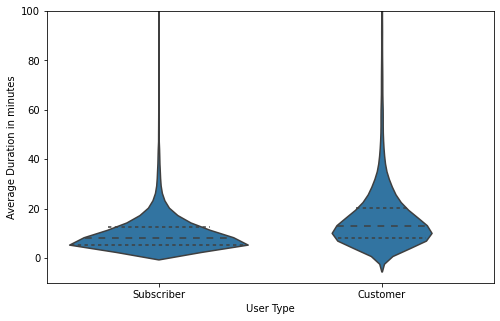

In [22]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.violinplot(data = df, x = 'user_type', y = 'duration_min', color = color, inner = 'quartile')
plt.ylim(-10, 100)
plt.xlabel('User Type')
plt.ylabel('Average Duration in minutes');

The viloin plot for customers is wider than the one for subscribers. Also, susbcibers' trips last less than customers' trips.  As stated in the previous part (Univariate Exploration), one can say that subscribers use GoBike as a quick and easy mode of transpaort to their destination for their daily activities. Also, I assume that subscribers are used to riding bikes and that's why they might be cycling faster.

Now, I am curious to know the number of suscribers and customers during weekends and weekdays to validate the above assumption. Let's explore <b>day</b> versus <b>user_type</b>

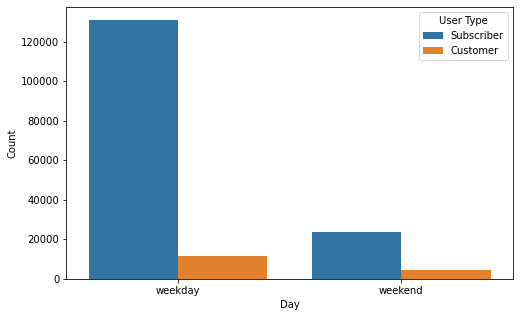

In [23]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
ax = sb.countplot(data = df, x = 'day', hue = 'user_type')
ax.legend(title = 'User Type')
plt.xlabel('Day')
plt.ylabel('Count');

The above plot confirms what we assumed! Subscribers use GoBike on weekdays much more than they use it on weekends.

Next, we will explore <b>member_age</b> versus <b>duration_min</b>.

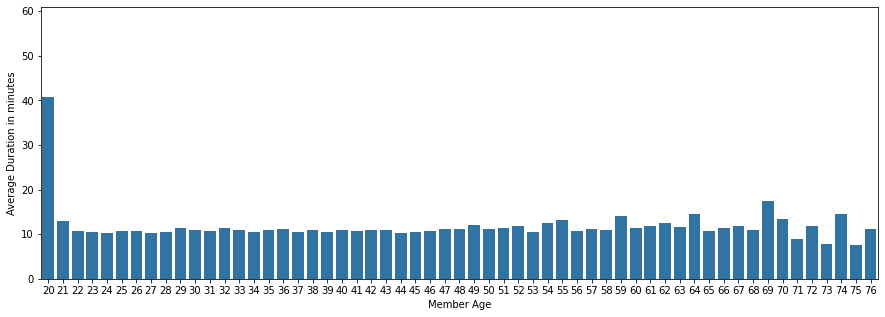

In [24]:
color = sb.color_palette()[0]
plt.figure(figsize = [15, 5])
sb.barplot(data = df, x = 'member_age', y = 'duration_min', color = color, errwidth = 0)
plt.xlabel('Member Age')
plt.ylabel('Average Duration in minutes');

There is a big difference in trip durations between users who are 20 years old and the rest of the age groups. If we have collected data from users who are younger than 20 years and they had the same behavior as users who are 20 years old, we could have deduced that younger users ride for a longer time. But in this dataset we do not have sufficient evidence for this. 

Finally, let's explore <b>member_gender</b> versus <b>duration_min</b>.

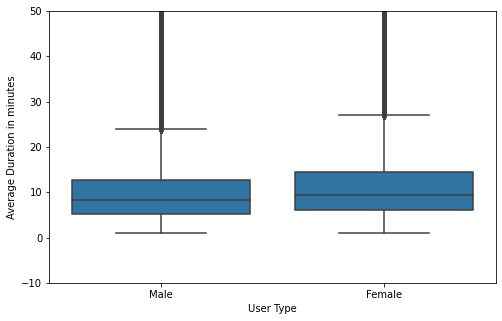

In [25]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min', color = color)
plt.ylim(-10, 50)
plt.xlabel('User Type')
plt.ylabel('Average Duration in minutes');

There is no significat difference in trip durations between males and females.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this part, we observed that trips that take place during weekends last longer than trips that take place during weekdays. We also observed that subscribers spend less time to finish their trips than customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I have observed the relationship between the user type and the day of the week.

<a id='multi'></a>
## Multivariate Exploration

Now, I will explore the relationship between the variables <b>duration_min</b>, <b>day</b> and <b>user_type</b> in a single plot to confirm the previous finidngs.

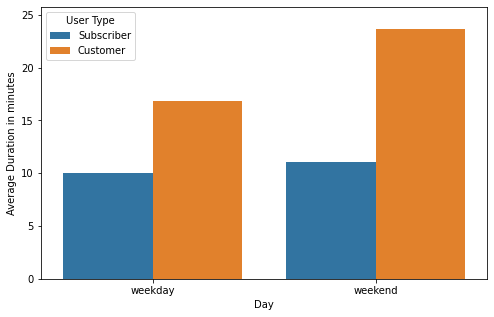

In [26]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
ax = sb.barplot(data = df, x = 'day', y = 'duration_min', hue = 'user_type', errwidth = 0)
ax.legend(title = 'User Type')
plt.xlabel('Day')
plt.ylabel('Average Duration in minutes');

There is no significant difference between weekdays and weekends for subscribers. However, customers' rides last longer on weekends.

Next, we will explore the relationship between the variables <b>duration_min</b>, <b>start_hour</b> and <b>user_type</b>.

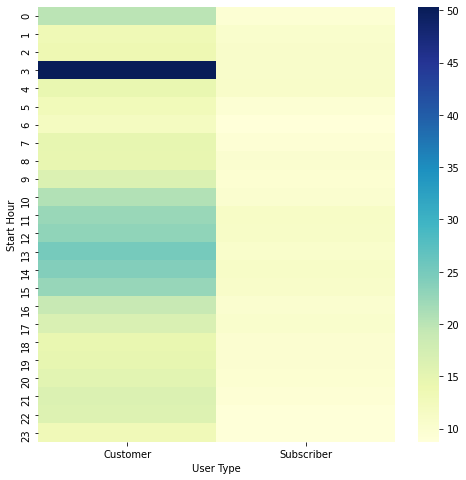

In [27]:
heatmap_data = pd.pivot_table(df, values='duration_min', 
                     index=['start_hour'], 
                     columns='user_type')
plt.figure(figsize = [8, 8])
sb.heatmap(heatmap_data, cmap="YlGnBu")
plt.xlabel('User Type')
plt.ylabel('Start Hour');

Subscribers' trip durations are almost the same throughout the day. Customers' trips last longer at 3:00 o'clock in the morning and between 10:00 o'clock in the morning and 15:00 o'clock in the evening.

Finally, I will explore the relationship between the variables <b>duration_min</b>, <b>member_gender</b> and <b>user_type</b>.

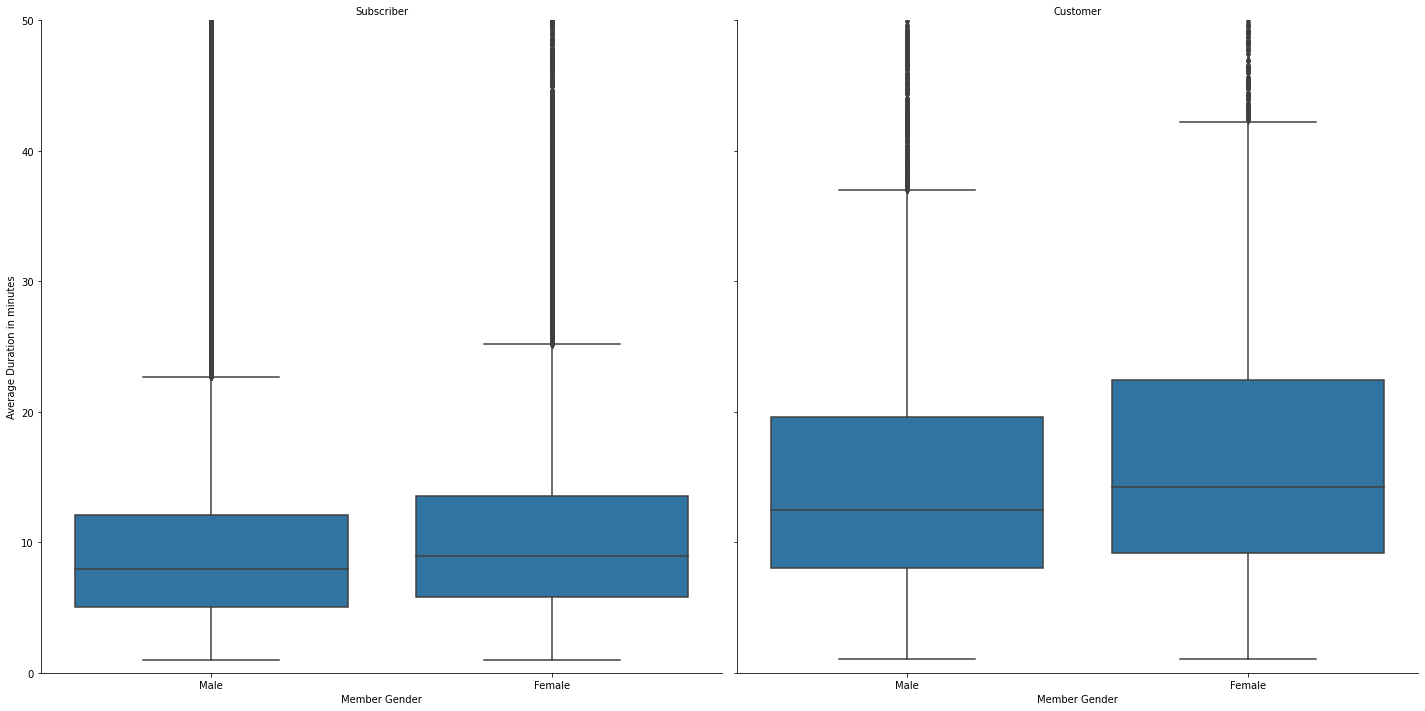

In [28]:
import warnings
warnings.filterwarnings('ignore')

ax = sb.FacetGrid(data = df, col = 'user_type', height = 10)
ax.map(sb.boxplot, 'member_gender', 'duration_min')
ax.set_axis_labels('Member Gender', 'Average Duration in minutes')
ax.set_titles(col_template = '{col_name}')
plt.ylim(0, 50);

The average trip duration for males and females is almost the same even after including the user type as a third variable.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I observed the relationship between the day of the week, the user type and the average trip duration. I also observed the relatioship between the user type, the start hour of the trip and the average trip duration. In the last plot, I have shown the relationship between the user gender, the user type and the average trip duration. 

### Were there any interesting or surprising interactions between features?

Yes! The day of the week and the user type strenghten each other and can indicate the duration of the trip. Subscribers' rides durations are slightly longer on weekends (not that significant though). Customers' rides last longer than suscribers' rides. Also customers ride longer during weekends.

In [29]:
!jupyter nbconvert --to html exploration.ipynb

[NbConvertApp] Converting notebook exploration.ipynb to html
[NbConvertApp] Writing 865574 bytes to exploration.html
